### Importar as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb

## Dados de respostas

In [2]:
# Carregar os dados das respostas do POSCOMP 2016
dados_respostas_2016 = pd.read_csv('dados/respostas_poscomp/exportacao_respostas_poscomp_2016.csv', sep=';', encoding='utf-8')
dados_respostas_2017 = pd.read_csv('dados/respostas_poscomp/exportacao_respostas_poscomp_2017.csv', sep=';', encoding='utf-8')
dados_respostas_2018 = pd.read_csv('dados/respostas_poscomp/exportacao_respostas_poscomp_2018.csv', sep=';', encoding='utf-8')
dados_respostas_2019 = pd.read_csv('dados/respostas_poscomp/exportacao_respostas_poscomp_2019.csv', sep=';', encoding='utf-8')

In [3]:
dados_respostas_2016

,NUM,NÚMERO DE INSCRIÇÃO,SITUAÇÃO,1,2,3,4,5,6,7,...,61,62,63,64,65,66,67,68,69,70
0,"1,003E+11",39401673171,Presente,E,A,B,D,A,A,C,...,D,A,A,A,D,C,A,NaN,B,D
1,"1,018E+11",39401645886,Presente,B,A,E,C,A,A,C,...,D,A,C,A,E,C,C,C,C,A
2,"1,009E+11",39401663587,Presente,E,A,B,D,A,A,C,...,D,A,A,A,E,C,A,C,B,D
3,"1,045E+11",39401651770,Presente,E,E,D,B,D,B,D,...,D,A,E,E,E,C,A,B,B,C
4,"1,005E+11",39401671273,Presente,B,A,D,C,E,D,B,...,C,E,E,A,E,C,C,C,A,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,"1,013E+11",39401640653,Presente,B,A,C,E,A,B,B,...,C,C,C,C,E,C,C,C,C,D
4215,"1,003E+11",39401635473,Presente,B,C,B,D,A,A,C,...,D,A,A,NaN,NaN,NaN,NaN,C,B,D
4216,"1,00504E+11",39401652971,Presente,B,A,D,D,C,A,C,...,E,A,C,A,E,C,C,E,B,C
4217,"1,02005E+11",39401660786,Presente,E,B,D,C,C,A,B,...,B,A,B,A,B,C,B,E,A,C


In [3]:
# Acrescentar o ano nos dataframe
dados_respostas_2016 = dados_respostas_2016.assign(ANO='2016')
dados_respostas_2017 = dados_respostas_2017.assign(ANO='2017')
dados_respostas_2018 = dados_respostas_2018.assign(ANO='2018')
dados_respostas_2019 = dados_respostas_2019.assign(ANO='2019')

In [4]:
# Unir as tabelas de dados_respostas de todos os anos
dados_respostas = pd.concat([dados_respostas_2016, dados_respostas_2017, dados_respostas_2018, dados_respostas_2019], axis=0)
dados_respostas = dados_respostas.drop(columns=['NOME CANDIDATO','SALA', 'NUM'])

(array([4219.,    0.,    0., 4017.,    0.,    0., 3447.,    0.,    0.,
        2892.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

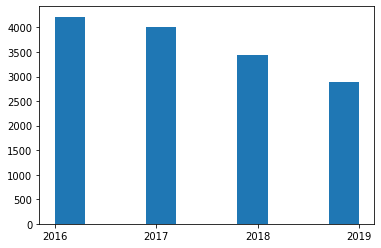

In [5]:
plt.hist(dados_respostas['ANO'])

(array([11829.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2746.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

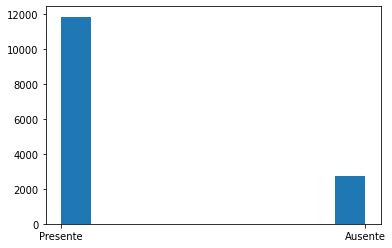

In [6]:
plt.hist(dados_respostas['SITUAÇÃO'])

In [7]:
dados_respostas = dados_respostas.set_index('NÚMERO DE INSCRIÇÃO')

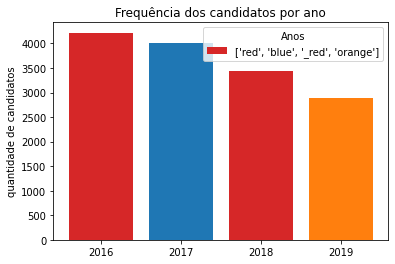

In [8]:
fig, ax = plt.subplots()

ano = ['2016', '2017', '2018', '2019']
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(ano, dados_respostas['ANO'].value_counts(), label=bar_labels, color=bar_colors)

ax.set_ylabel('quantidade de candidatos')
ax.set_title('Frequência dos candidatos por ano')
ax.legend(title='Anos')

plt.show()

## Dados de Homologação

In [4]:
dados_homologados_2016 = pd.read_csv("dados/homologação_poscomp/homologados_dados_contatos_poscomp_2016.csv", sep=';', encoding='utf-8')
dados_homologados_2017 = pd.read_csv("dados/homologação_poscomp/homologados_dados_contatos_poscomp_2017.csv", sep=';', encoding='utf-8')
dados_homologados_2018 = pd.read_csv("dados/homologação_poscomp/homologados_dados_contatos_poscomp_2018.csv", sep=';', encoding='utf-8')
dados_homologados_2019 = pd.read_csv("dados/homologação_poscomp/homologados_dados_contatos_poscomp_2019.csv", sep=';', encoding='utf-8')

In [5]:
dados_homologados_2016

,NOME,CPF,DATA NASC.,SEXO,TIPO DE DOCUMENTO,DOCUMENTO,NOME DO PAI,NOME DA MÃE,ENDERECO.,NUMERO,...,INSCRICAO,DATA INSCRIÇÃO,CARGO,CÓDIGO,DS CARGO,DEFICIENTE,LOCAL DE PROVA,NECESSIDADES ESPECIAIS,DESCRICAO DA NECESSIDADE,ESTRANGEIRO
0,ABEL CASTRO CONDORI,000.000.972-32,27/10/1992,M,99,47430485,Samuel Mario Condori Bolivar,Mercedes Cupertina Castro Flores,Pampas de Polanco,16,...,39401673171-6,04/07/2016 11:18,1-Mestrado/Doutorado,1,Mestrado/Doutorado,NaN,Arequipa - PERU,N,NaN,NaN
1,ABELARDO VIEIRA MOTA,013.692.163-94,29/11/1989,M,99,"2,003E+12",LUIS VIEIRA TEIXEIRA,MARIA DE JESUS VIEIRA MOTA,Mário Studart,380,...,39401645886-1,12/06/2016 20:27,1-Mestrado/Doutorado,1,Mestrado/Doutorado,NaN,Fortaleza - CE,N,NaN,NaN
2,ABNER MATHEUS COSTA DE ARAUJO,111.403.224-78,23/02/1995,M,99,3966323,MANOEL BATISTA DA COSTA,ALBANERY REJANE CORDEIRO DE ARAUJO COSTA,Avenida da Azenha,324,...,39401663587-8,28/06/2016 06:53,1-Mestrado/Doutorado,1,Mestrado/Doutorado,NaN,Campina Grande - PB,N,NaN,NaN
3,ABNER MOISES DOS SANTOS GOMES,388.006.478-47,13/12/1991,M,99,499921094,Jonas Gomes,Eliane Ribeiro dos Santos Gomes,Gregório Aversa,450,...,39401651770-6,16/06/2016 18:58,1-Mestrado/Doutorado,1,Mestrado/Doutorado,NaN,São Carlos - SP,N,NaN,NaN
4,ABRAAO DA COSTA SANTANA,908.770.632-49,29/09/1986,M,99,4672338,Marcelo José dos Santos Santana,Suely da Costa Santana,Augusto Montenegro,200,...,39401671273-0,03/07/2016 13:12,1-Mestrado/Doutorado,1,Mestrado/Doutorado,NaN,Belém - PA,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,YUSSEF PARCIANELLO,005.462.850-40,20/04/1985,M,99,4081968788,Eroni José Parcianello,Maria Cristina Rodrigues Parcianello,Rua Guilherme José Missen,288,...,39401640653-0,06/06/2016 14:42,1-Mestrado/Doutorado,1,Mestrado/Doutorado,NaN,Chapecó - SC,N,NaN,NaN
4215,YUSSELI LIZETH MENDEZ MENDOZA,000.000.971-17,03/08/1990,F,99,46954625,Herberg Mendez Silva,Rosa Elena Mendoza Justo,Av. Los Libertadores,L-12,...,39401635473-9,01/06/2016 22:26,1-Mestrado/Doutorado,1,Mestrado/Doutorado,NaN,Arequipa - PERU,N,NaN,NaN
4216,YVAN PEREIRA DOS SANTOS BRITO,018.228.412-32,26/01/1996,M,99,6902434,Waldir Pereira de Brito,Ana do Socorro Ferreira dos Santos,Travessa We-40,332,...,39401652971-7,18/06/2016 12:51,1-Mestrado/Doutorado,1,Mestrado/Doutorado,NaN,Belém - PA,N,NaN,NaN
4217,ZANALIS ALVES BARBOSA,054.554.631-10,08/06/1996,F,99,6309672,Edivaldo Batista Barbosa,Maria Pedrosa Alves Barbosa,Rua Alaor Mendonça,sn,...,39401660786-3,26/06/2016 16:58,1-Mestrado/Doutorado,1,Mestrado/Doutorado,NaN,Goiânia - GO,N,NaN,NaN


In [10]:
dados_homologados_2016 = dados_homologados_2016.assign(ANO='2016')
dados_homologados_2017 = dados_homologados_2017.assign(ANO='2017')
dados_homologados_2018 = dados_homologados_2018.assign(ANO='2018')
dados_homologados_2019 = dados_homologados_2019.assign(ANO='2019')

In [11]:
dados_homologados = pd.concat([dados_homologados_2016, dados_homologados_2017, dados_homologados_2018, dados_homologados_2019], axis=0)
dados_homologados = dados_homologados.drop(columns=['NOME','CPF', 'DATA NASC.', 'TIPO DE DOCUMENTO', 'DOCUMENTO','NOME DO PAI', 
                                                    'NOME DA MÃE', 'EMAIL', 'DDD', 'FONE', 'DDD CEL', 'CELULAR', 'SENHA', 'DATA INSCRIÇÃO',
                                                    'DEFICIENTE', 'NECESSIDADES ESPECIAIS', 'DESCRICAO DA NECESSIDADE', 'ESTRANGEIRO', 
                                                    'DS CARGO', 'COMPL.', 'ENDERECO.', 'BAIRRO', 'CEP', 'NUMERO'])

In [12]:
dados_homologados = dados_homologados.set_index('INSCRICAO')

In [13]:
dados_homologados[dados_homologados['CARGO'] == '01/08/2019 23:19']

,SEXO,CIDADE,ESTADO,CARGO,CÓDIGO,LOCAL DE PROVA,ANO
INSCRICAO,,,,,,,
miamia,M,Messejana,Fortaleza,01/08/2019 23:19,1-Mestrado/Doutorado,NaN,2019


In [14]:
dados_homologados.drop(['688145', 'miamia'], inplace=True)

(array([13700.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   873.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

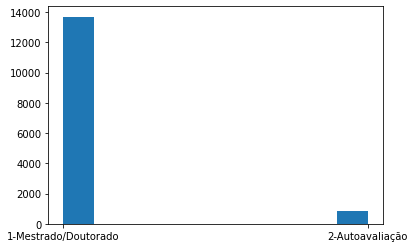

In [15]:
plt.hist(dados_homologados['CARGO'])

## Notas das respostas

#### Base de 2016 a 2019

In [16]:
import services.listasColunas as lc
import services.alterarColunas as altc

importing Jupyter notebook from C:\Users\jeanc\Documentos\Projeto de pesquisa mestrado\project_dataScience_POSCOMP\services\listasColunas.ipynb
importing Jupyter notebook from C:\Users\jeanc\Documentos\Projeto de pesquisa mestrado\project_dataScience_POSCOMP\services\alterarColunas.ipynb


In [17]:
dados_notasRespostas_2016 = pd.read_csv("dados/notas_poscomp/Notas_poscomp_2016.csv", sep=';', encoding='utf-8')
dados_notasRespostas_2017 = pd.read_csv("dados/notas_poscomp/Notas_poscomp_2017.csv", sep=';', encoding='utf-8')
dados_notasRespostas_2018 = pd.read_csv("dados/notas_poscomp/Notas_poscomp_2018.csv", sep=';', encoding='utf-8')
dados_notasRespostas_2019 = pd.read_csv("dados/notas_poscomp/Notas_poscomp_2019.csv", sep=';', encoding='utf-8')

In [18]:
dados_notasRespostas_2016 = dados_notasRespostas_2016.assign(ANO='2016')
dados_notasRespostas_2017 = dados_notasRespostas_2017.assign(ANO='2017')
dados_notasRespostas_2018 = dados_notasRespostas_2018.assign(ANO='2018')
dados_notasRespostas_2019 = dados_notasRespostas_2019.assign(ANO='2019')

In [19]:
dados_notasRespostas_2016 = dados_notasRespostas_2016[lc.lista_2016]
dados_notasRespostas_2017 = dados_notasRespostas_2017[lc.lista_2017]
dados_notasRespostas_2018 = dados_notasRespostas_2018[lc.lista_2018]
dados_notasRespostas_2019 = dados_notasRespostas_2019[lc.lista_2019]

In [20]:
dados_notasRespostas_2016 = dados_notasRespostas_2016.rename(columns=altc.alteraColunas_2016)
dados_notasRespostas_2017 = dados_notasRespostas_2017.rename(columns=altc.alteraColunas_2017)
dados_notasRespostas_2018 = dados_notasRespostas_2018.rename(columns=altc.alteraColunas_2018)
dados_notasRespostas_2019 = dados_notasRespostas_2019.rename(columns=altc.alteraColunas_2019)

In [21]:
dados_notasRespostas = pd.concat([dados_notasRespostas_2016, dados_notasRespostas_2017, dados_notasRespostas_2018, dados_notasRespostas_2019], axis=0)

In [22]:
dados_notasRespostas = dados_notasRespostas.set_index('INSCRICAO')

## Salvar dados

In [23]:
dados_respostas.to_csv('dados/respostas_poscomp/dados_respostas.csv')

In [24]:
dados_homologados.to_csv('dados/homologação_poscomp/dados_homologados.csv')

In [25]:
dados_notasRespostas.to_csv('dados/notas_poscomp/dados_notasRespostas.csv')